In [2]:
!pip install qutip
import qutip as qt

qt.cite()

@misc{qutip5,
  title = {{QuTiP} 5: The Quantum Toolbox in {Python}},
  author = {Lambert, Neill and Giguère, Eric and Menczel, Paul and Li, Boxi
    and Hopf, Patrick and Suárez, Gerardo and Gali, Marc and Lishman, Jake
    and Gadhvi, Rushiraj and Agarwal, Rochisha and Galicia, Asier
    and Shammah, Nathan and Nation, Paul D. and Johansson, J. R.
    and Ahmed, Shahnawaz and Cross, Simon and Pitchford, Alexander
    and Nori, Franco},
  year={2024},
  eprint={2412.04705},
  archivePrefix={arXiv},
  primaryClass={quant-ph},
  url={https://arxiv.org/abs/2412.04705},
  doi={10.48550/arXiv.2412.04705},
}


Quantum object: dims=[[15], [1]], shape=(15, 1), type='ket', dtype=Dense
Qobj data =
[[ 4.74225231e-01+3.23426223e-19j]
 [ 3.55668923e-01+4.57239154e-01j]
 [-1.23114221e-01+4.84975359e-01j]
 [-3.23281449e-01+1.41466448e-01j]
 [-1.89430203e-01-1.02801064e-01j]
 [-1.92095130e-02-1.16161889e-01j]
 [ 3.98425834e-02-4.31285218e-02j]
 [ 2.70114792e-02+2.29389928e-03j]
 [ 6.38053378e-03+9.81619472e-03j]
 [-1.55973018e-03+4.50471114e-03j]
 [-1.74342144e-03+5.92825689e-04j]
 [-5.66552028e-04-3.72751916e-04j]
 [-1.89268059e-05-2.38579482e-04j]
 [ 5.93139138e-05-5.41873120e-05j]
 [ 2.85378394e-05+4.88225564e-06j]]
(225, 225)
10.0%. Run time:   0.06s. Est. time left: 00:00:00:00
20.0%. Run time:   0.10s. Est. time left: 00:00:00:00
30.0%. Run time:   0.21s. Est. time left: 00:00:00:00
40.0%. Run time:   0.41s. Est. time left: 00:00:00:00
50.0%. Run time:   0.49s. Est. time left: 00:00:00:00
60.0%. Run time:   0.68s. Est. time left: 00:00:00:00
70.0%. Run time:   1.26s. Est. time left: 00:00:00:00


<Figure size 640x480 with 0 Axes>

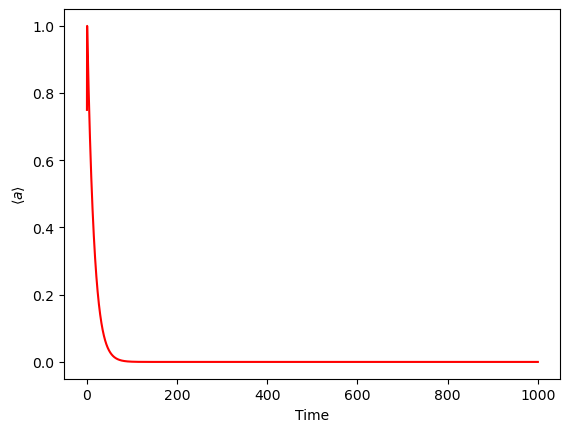

<Figure size 640x480 with 0 Axes>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import random 
import scipy
from scipy.linalg import expm, sinm, cosm
from qutip import *

k = 4
m = 4
systemSize = 15

#Defining operators 
a = qt.destroy(systemSize)
aM = a**m

aDagger = qt.create(systemSize)
aDaggerM = aDagger**m

n_hat = aDagger* a
M_joint = (aDagger**m)*(a**m)
identity = qt.qeye(systemSize)

#Defining parameters 
gamma1 = 1
gammaM = gamma1/10
delta = 0.4 * gamma1
eta = 0.5
theta = 0
beta = 3


#Creating random initial coherent state to start in
#alpha_re = random.random() * random.choice([-1, 1])
#alpha_im = random.random() * random.choice([-1, 1])
#alpha = alpha_re + alpha_im*1j
#rho0 = qt.coherent_dm(systemSize, alpha)



#Starting in coherent state 

alpha =  0.5 * beta
alpha = alpha * (np.cos(3 * np.pi / 9) + (1j * np.sin(2 * np.pi / 9)))

rho0 = qt.coherent(systemSize, alpha = alpha)

#Starting in Fock state 

#rho0 = qt.fock_dm(systemSize, 1) 

print(rho0)

Hamiltonian = (delta * n_hat) + (1j * eta) * (a**k * np.exp(1j * theta * k) - aDagger**k * np.exp(-1j * theta * k))
c_ops = [np.sqrt(gamma1) * a, np.sqrt(gammaM) * aM] 
L = qt.liouvillian(Hamiltonian, c_ops, data_only=False, chi=None)

print(L.shape)

#Time we span through of state 
time_list = np.logspace(-2, 3, 10000)

options = qt.Options(nsteps=20000, progress_bar=True)

result = qt.mesolve(L, rho0, time_list, options=options)

plt.plot(time_list, expect(a, result.states), label=r'Re$\langle a \rangle$',color = 'red')
plt.xlabel('Time')
plt.ylabel(r'$\langle a \rangle$')
plt.figure()
#plt.plot(time_list,  expect(rho0[0,0], result.states))
#plt.xlabel('Time')
#plt.ylabel(r'$\rho_{00}$ population')
#plt.show()

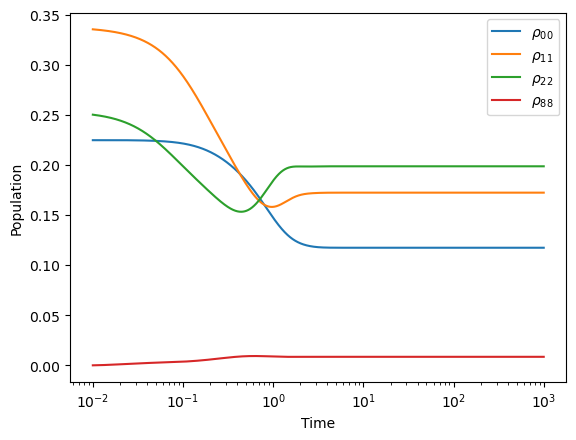

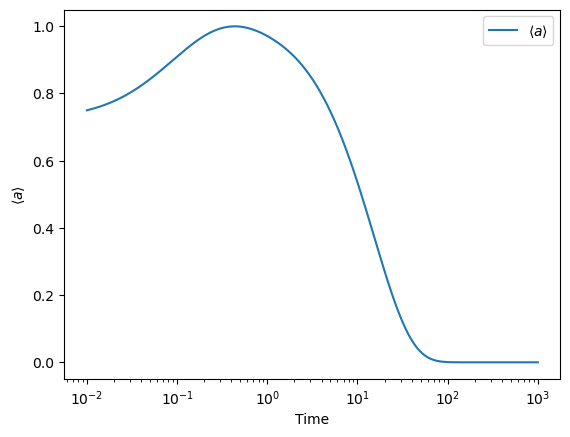

In [24]:
P0 = qt.fock_dm(systemSize, 0)  # Projector for ground state |0><0|
P1 = qt.fock_dm(systemSize, 1)  # Projector for first excited state |1><1|
P2 = qt.fock_dm(systemSize, 2)
P4 = qt.fock_dm(systemSize, 4)
P8 = qt.fock_dm(systemSize, 8)


pop0 = [qt.expect(P0, state) for state in result.states]  # Population of |0><0|
pop1 = [qt.expect(P1, state) for state in result.states]  # Population of |1><1|
pop2 = [qt.expect(P2, state) for state in result.states]  # Population of |1><1|
pop4 = [qt.expect(P4, state) for state in result.states]  # Population of |4<4|
pop8 = [qt.expect(P8, state) for state in result.states]  # Population of |8><8|

import matplotlib.pyplot as plt

plt.plot(time_list, pop0, label=r'$\rho_{00}$')
plt.plot(time_list, pop1, label=r'$\rho_{11}$')
plt.plot(time_list, pop2, label=r'$\rho_{22}$')
#plt.plot(time_list, pop4, label=r'$\rho_{44}$')
plt.plot(time_list, pop8, label=r'$\rho_{88}$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.show()


a_exp = [qt.expect(a, state) for state in result.states]  # Population of |8><8|
plt.plot(time_list, a_exp, label=r'$\langle a \rangle$')
plt.xlabel('Time')
plt.ylabel(r'$\langle a \rangle$')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.show()